In [1]:
from bs4 import BeautifulSoup as Soup #decode
import numpy as np #np.nan
import requests
import time #for time delay
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import copy
import re
import Carscraper8891 as scrap
import matplotlib.font_manager as font_manager

In [178]:
#Database
df_car = pd.read_csv("./df_car_info.csv")


In [179]:
df_car

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7186,3726211,三陽/SYM,野狼傳奇R 150,白色,12,0.1,30000.0,NaN,野狼傳奇R 150 PA15E1 白色寬胎噴射版 完全沒發生過事故，極少騎乘...,28000.0
7187,3778411,山葉/Yamaha,MT-03,灰色,6,0.3,55000.0,原漆 土除 ABS 中控鎖 液晶面板 液晶儀錶 晶片鑰匙,Yamaha MT03 2018年 跑5.5 萬公里 改裝拉桿 改裝鏈條 ...,116000.0
7188,3794992,其他廠牌,other,灰色,5,NaN,NaN,NaN,【杰運機車】Gogoro 3系列 Plus 版 iQ System智慧鑰匙卡 ...,39000.0
7189,3794959,三陽/SYM,Jet S,灰色,5,0.1,35700.0,土除 ABS 中控鎖 行車電腦 駐車架 液晶儀錶 後車箱 鋁合金鋼圈,【杰運機車】2019 SYM Jet S 125 雙碟ABS 版 彩晶式LE...,49000.0


# Scrap and Update database

In [184]:
# Scrap and Update database
reload(scrap)
car_scaper = scrap.CarScraper(df_car)
df_new_car_info = car_scaper.new_scraped(90)

init
scraping 1 / 3 page
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
added 3797390
This ID has already scraped
added 3796430
added 3796351
added 3796349
added 3796347
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
added 3794428
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
This ID has already scraped
scraping 2 / 3 page
This ID has already scraped
added 3795953
This ID has already scraped
This ID has already scraped
added 3795023
added 3795013
This ID has already scraped
This ID has already scraped
This ID has alrea

In [ ]:
# simply clean the data
df_new_car_info = car_scaper.clean_df(df_new_car_info)

In [187]:
#Save thd new-scraped data into database
new_df_car_info = car_scaper.Update_database(df_new_car_info,'./df_car_info.csv')
new_df_car_info

Saved


,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7204,3794448,山葉/Yamaha,新勁戰125,白色,14,0.1,NaN,,1. 2010 年 2. 全原廠車況正常。 3. 全台皆可協助銀行分期 0...,23000.0
7205,3794447,光陽/KYMCO,勁多利,藍色,7,0.1,NaN,,1. 2017 年 2. 全原廠車況正常。 3. 全台皆可協助銀行分期 0...,32000.0
7206,3794446,Gogoro,Viva,粉色,3,0.1,NaN,,1. 2021 年 2. 全原廠車況正常。 3. 全台皆可協助銀行分期 0...,43000.0
7207,3794071,三陽/SYM,Joymax 300,灰色,2,0.3,17000.0,原漆 皮椅 ABS 液晶面板 行車電腦 液晶儀錶 後車箱 碳纖維篩板 防盜引擎鑑識,2022 三陽SYM JOYMAX Z+300IABS 實跑1.7 萬公里 ...,128000.0


# Observation

In [188]:
new_df_car_info.describe()

,used year,gas,mileage,price
count,7209.000000,6981.000000,5912.000000,7.197000e+03
mean,12.428908,0.177969,26714.697148,6.717430e+04
std,5.322843,0.284859,53843.965076,1.214242e+05
min,0.000000,0.000000,0.000000,1.000000e+03
25%,9.000000,0.100000,7486.750000,2.500000e+04
50%,12.000000,0.100000,15000.000000,3.600000e+04
75%,15.000000,0.100000,30000.000000,5.500000e+04
max,33.000000,6.000000,940000.000000,1.600000e+06


In [189]:
new_df_car_info['price'].mean(),new_df_car_info['price'].median(),new_df_car_info['price'].mode()

(67174.30411282479,
 36000.0,
 0    25000.0
 dtype: float64)

In [190]:
new_df_car_info['Company'].unique()

array(['比雅久/PGO', '三陽/SYM', '山葉/Yamaha', '光陽/KYMCO', '本田/HONDA',
       '川崎/Kawasaki', 'Gogoro', '其他廠牌', '臺鈴/Suzuki', '哈特佛/Hartford',
       '哈雷/Harley', 'Victory', 'SUZUKI', '永豐/YuenFoong', '偉士牌/Vespa',
       '杜卡迪/Ducati', 'BMW', '豪邁', 'KTM', 'Benelli/倍力尼', '宏佳騰',
       '亞帝發/Adiva', 'Aprilia', '捷穎/CPI', 'TRIUMPH', 'ZERO', 'BSA',
       'MVAgusta', '台灣摩托', '必翔'], dtype=object)

In [191]:
len(new_df_car_info[new_df_car_info['used year']>8])

5673

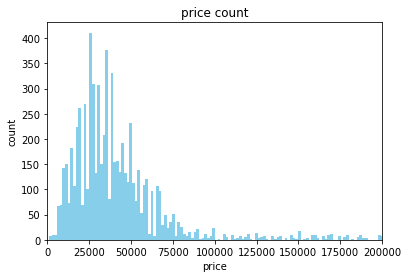

In [192]:
plt.Figure(figsize=(50,25))
plt.hist(new_df_car_info['price'],bins = 1000, color = 'skyblue')
plt.xlim(0,200000)
plt.xlabel('price')
plt.ylabel('count')
plt.title('price count')
plt.show()

findfont: Font family ['/Users/tamchonman/Documents/NTU/Reasrch/LCOC_Taiwan/微软正黑体.ttf'] not found. Falling back to DejaVu Sans.


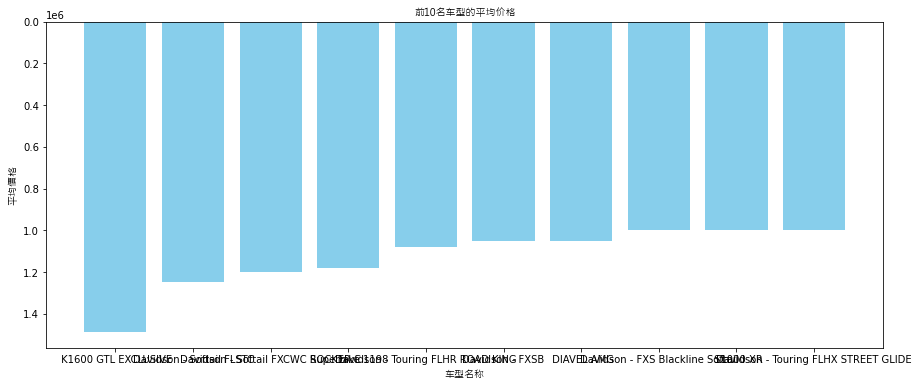

In [193]:
df_car_info = new_df_car_info
font_path = '/Users/tamchonman/Documents/NTU/Reasrch/LCOC_Taiwan/微软正黑体.ttf'

font_prop = font_manager.FontProperties(fname=font_path)

# 统计每个名字对应的平均价格
name_price_mean = df_car_info.groupby('Model')['price'].mean().reset_index()

# 排序数据，按平均价格降序排列
name_price_mean = name_price_mean.sort_values(by='price', ascending=False)

# 取前 10 个名字和价格
top_10_names = name_price_mean.head(10)

# 绘制统计图
plt.rc('font', family=font_path)
plt.figure(figsize=(15, 6))
plt.bar(top_10_names['Model'], top_10_names['price'], color='skyblue')
plt.xlabel('车型名称',fontproperties=font_prop)
plt.ylabel('平均價格',fontproperties=font_prop)
plt.title('前10名车型的平均价格',fontproperties=font_prop)
plt.gca().invert_yaxis()  # 翻转 y 轴，使价格高的显示在顶部
plt.show()

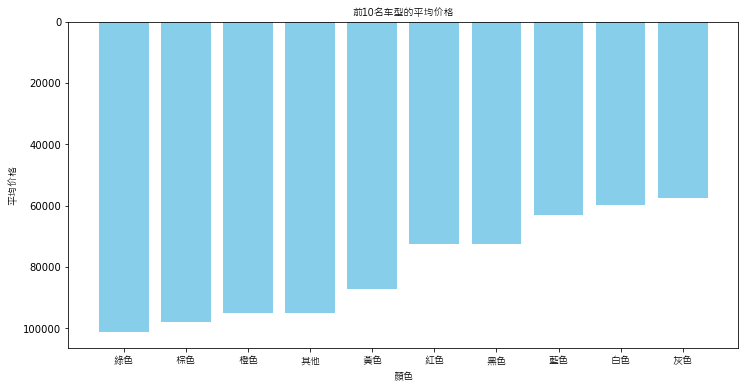

In [194]:
# 统计每个名字对应的平均价格
color_price_mean = df_car_info.groupby('Color')['price'].mean().reset_index()

# 排序数据，按平均价格降序排列
color_price_mean = color_price_mean.sort_values(by='price', ascending=False)

# 取前 10 个名字和价格
top_10_color = color_price_mean[0:10]

# 绘制统计图
plt.figure(figsize=(12, 6))
plt.bar(top_10_color['Color'], top_10_color['price'], color='skyblue')
plt.xticks(fontproperties=font_prop)
plt.ylabel('平均价格', fontproperties=font_prop)
plt.xlabel('顏色', fontproperties=font_prop)
plt.title('前10名车型的平均价格',fontproperties=font_prop)
plt.gca().invert_yaxis()  # 翻转 y 轴，使价格高的显示在顶部
plt.show()

findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.


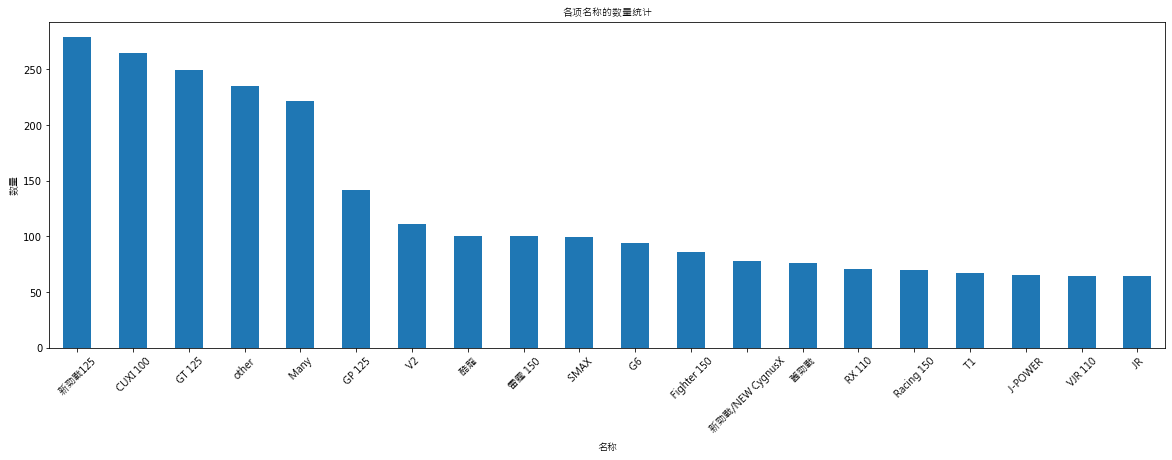

In [195]:
name_counts = df_car_info['Model'].value_counts().head(20)

plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(20, 6))
name_counts.plot(kind='bar')
plt.xticks(fontproperties=font_prop)
plt.xlabel('名称',fontproperties=font_prop)
plt.ylabel('数量',fontproperties=font_prop)
plt.title('各项名称的数量统计',fontproperties=font_prop)
plt.xticks(rotation=45)
plt.show()

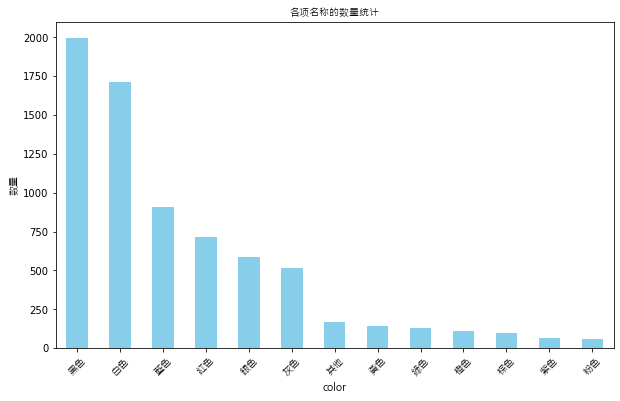

In [196]:
color_counts = df_car_info['Color'].value_counts()

plt.rc('font', family='Microsoft JhengHei')
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')
plt.xticks(fontproperties=font_prop)
plt.xlabel('color',fontproperties=font_prop)
plt.ylabel('数量',fontproperties=font_prop)
plt.title('各项名称的数量统计',fontproperties=font_prop)
plt.xticks(rotation=45)
plt.show()

# Mechaine Learning Part

## Missing Vaule

In [197]:
Data_X = new_df_car_info.copy()
Data_X

,car_id,Company,Model,Color,used year,gas,mileage,Outfit,detail,price
0,3655422,比雅久/PGO,Alpha Max 125,綠色,5,0.1,12900.0,原漆土除液晶面板液晶儀錶,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,36000.0
1,3667258,三陽/SYM,迪爵 125,灰色,4,0.1,32100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,40000.0
2,3683117,三陽/SYM,迪爵 125,藍色,4,0.1,30300.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,35000.0
3,3683119,山葉/Yamaha,GTR AERO,白色,11,0.1,24100.0,原漆土除液晶面板,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,26000.0
4,3685029,山葉/Yamaha,勁豪125/AXIS Z,黑色,3,0.1,18000.0,原漆土除,Hello~我們是笛加車業LINEID：@djcar找車問笛加(DJ-car)：幫您找五年內...,41000.0
...,...,...,...,...,...,...,...,...,...,...
7204,3794448,山葉/Yamaha,新勁戰125,白色,14,0.1,NaN,,1. 2010 年 2. 全原廠車況正常。 3. 全台皆可協助銀行分期 0...,23000.0
7205,3794447,光陽/KYMCO,勁多利,藍色,7,0.1,NaN,,1. 2017 年 2. 全原廠車況正常。 3. 全台皆可協助銀行分期 0...,32000.0
7206,3794446,Gogoro,Viva,粉色,3,0.1,NaN,,1. 2021 年 2. 全原廠車況正常。 3. 全台皆可協助銀行分期 0...,43000.0
7207,3794071,三陽/SYM,Joymax 300,灰色,2,0.3,17000.0,原漆 皮椅 ABS 液晶面板 行車電腦 液晶儀錶 後車箱 碳纖維篩板 防盜引擎鑑識,2022 三陽SYM JOYMAX Z+300IABS 實跑1.7 萬公里 ...,128000.0


In [198]:
Data_X.shape

(7209, 10)

In [199]:
Data_X =Data_X.drop(columns='car_id')
Data_X =Data_X.drop(columns='Company')
Data_X =Data_X.drop(columns='Outfit')
Data_X =Data_X.drop(columns='detail')
Data_X

,Model,Color,used year,gas,mileage,price
0,Alpha Max 125,綠色,5,0.1,12900.0,36000.0
1,迪爵 125,灰色,4,0.1,32100.0,40000.0
2,迪爵 125,藍色,4,0.1,30300.0,35000.0
3,GTR AERO,白色,11,0.1,24100.0,26000.0
4,勁豪125/AXIS Z,黑色,3,0.1,18000.0,41000.0
...,...,...,...,...,...,...
7204,新勁戰125,白色,14,0.1,NaN,23000.0
7205,勁多利,藍色,7,0.1,NaN,32000.0
7206,Viva,粉色,3,0.1,NaN,43000.0
7207,Joymax 300,灰色,2,0.3,17000.0,128000.0


In [200]:
Data_X.isna().sum()

Model           0
Color           0
used year       0
gas           228
mileage      1297
price          12
dtype: int64

findfont: Font family ['Microsoft JhengHei'] not found. Falling back to DejaVu Sans.


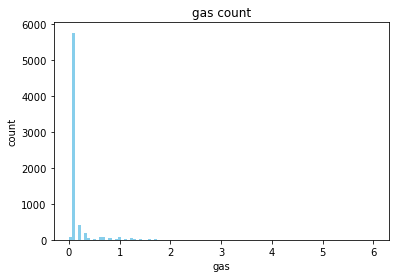

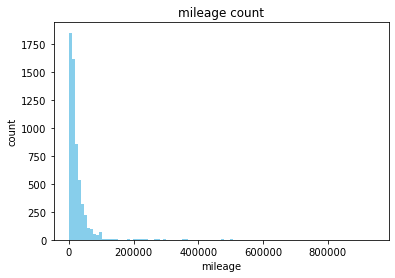

In [201]:
features = ['gas','mileage']

for feature in features:
    plt.Figure(figsize=(50,25))
    plt.hist(Data_X[feature],bins = 100, color = 'skyblue')
    # plt.xlim(0,2)
    plt.xlabel(f'{feature}')
    plt.ylabel('count')
    plt.title(f'{feature} count')
    plt.show()

In [202]:
gas_mean = Data_X['gas'].mean()
gas_median =Data_X['gas'].median()
gas_mode = Data_X['gas'].mode()

print(f'Gas mean: {gas_mean:.4f} \nGas median: {gas_median:.4f} \nGas mode: {gas_mode.iloc[0]:.4f}')

Gas mean: 0.1780 
Gas median: 0.1000 
Gas mode: 0.1000


In [203]:
#Gas 缺失
Data_X['gas'] = Data_X['gas'].fillna(gas_median)

Data_X.isna().sum()

Model           0
Color           0
used year       0
gas             0
mileage      1297
price          12
dtype: int64

In [204]:
mileage_mean =Data_X['mileage'].mean()
mileage_median =Data_X['mileage'].median()
mileage_mode = Data_X['mileage'].mode().iloc[0]

print(f'mileage mean: {mileage_mean:.4f} \nmileage median: {mileage_median:.4f} \nmileage mode: {mileage_mode:.4f}')

mileage mean: 26714.6971 
mileage median: 15000.0000 
mileage mode: 20000.0000


In [205]:
#mileage 缺失
Data_X['mileage'].fillna(mileage_mode, inplace= True)

print(Data_X.isna().sum())

Model         0
Color         0
used year     0
gas           0
mileage       0
price        12
dtype: int64


In [206]:
Data_X = Data_X.dropna(subset=['price'])
print(Data_X.isna().sum())

Model        0
Color        0
used year    0
gas          0
mileage      0
price        0
dtype: int64


In [207]:
Data_X['Model'].unique()

array([' Alpha Max 125', ' 迪爵 125', ' GTR AERO', ' 勁豪125/AXIS Z',
       ' 雷霆 S150/Racing S150', ' JOG SWEET 115', ' Woo 110', ' CUE 100',
       ' 新勁戰125', ' VJR 125', ' Many110', ' JET SR', ' RS', ' Many',
       ' NXC125RA', ' Vivo 125', ' CUXI 100', ' G6', ' XSENSE', ' GT 125',
       ' Tigra150', ' Racing 125', ' RAY-125', ' 新勁戰/NEW CygnusX',
       ' Jbubu 115', ' V2', ' Bon125', ' CB', ' BF150', ' CBR',
       ' nice-100', ' ER-6F', ' 酷龍', ' Limi', ' 雷霆 150',
       ' Cygnus X 125 FI', ' CYGNUS GRYPHUS 125ABS', ' 新名流150', ' RV 270',
       ' KRN BT 125 ABS', ' 2', 'other', ' FAMOUS 新名流 125', ' CHERRY',
       ' VINOORA 125', ' GP 125', ' GTR 125', ' DRG', ' Like 125', ' Z1',
       ' 勁風光 125', ' Fiddle 125', ' GSX-R 150', ' 小雲豹 mini125', ' KTR150',
       ' Racing 150', ' MII 110', 'Davidson - ROAD KING', ' MT-09',
       ' 金發財-150', ' SMAX', ' YZF-R3', ' 野狼傳奇R 150', ' Fiddle LT 115',
       ' Jet S', ' BWS', ' Fighter 150', ' HIGH-BALL', ' VISION TOUR',
       ' VEGA 125', ' K-

In [208]:
Data = Data_X.copy()
Data['price'] = Data['price']/10000

In [209]:
Data

,Model,Color,used year,gas,mileage,price
0,Alpha Max 125,綠色,5,0.1,12900.0,3.6
1,迪爵 125,灰色,4,0.1,32100.0,4.0
2,迪爵 125,藍色,4,0.1,30300.0,3.5
3,GTR AERO,白色,11,0.1,24100.0,2.6
4,勁豪125/AXIS Z,黑色,3,0.1,18000.0,4.1
...,...,...,...,...,...,...
7204,新勁戰125,白色,14,0.1,20000.0,2.3
7205,勁多利,藍色,7,0.1,20000.0,3.2
7206,Viva,粉色,3,0.1,20000.0,4.3
7207,Joymax 300,灰色,2,0.3,17000.0,12.8


<AxesSubplot:>

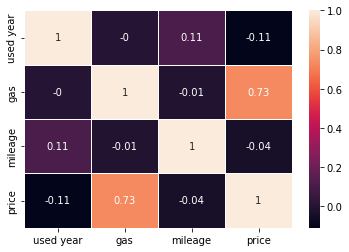

In [210]:
import seaborn as sns
correlation_matrix = Data.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, linewidths=.5)

# Feature Engineering

In [ ]:
# Encoder
# 使用 pandas 的 get_dummies 方法進行獨熱編碼
Data = pd.get_dummies(Data, columns=['Model'])
Data = pd.get_dummies(Data, columns=['Color'])

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# Data['Model'] = label_encoder.fit_transform(Data['Model'])
Data

In [212]:
#Standardlize
from sklearn.preprocessing import StandardScaler

# 創建一個 StandardScaler 對象
scaler = StandardScaler()

# 將 'mileage' 列標準化
Data['mileage'] = scaler.fit_transform(Data[['mileage']])
Data['gas'] = scaler.fit_transform(Data[['gas']])
Data

,used year,gas,mileage,price,Model_ (特仕版)/JR,Model_ 1190 Adventure,Model_ 150cc,Model_ 2,Model_ 2 Plus,Model_ 3 Plus,...,Color_灰色,Color_白色,Color_粉色,Color_紅色,Color_紫色,Color_綠色,Color_藍色,Color_銀色,Color_黃色,Color_黑色
0,5,-0.268942,-0.258061,3.6,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,4,-0.268942,0.134903,4.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,4,-0.268942,0.098063,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11,-0.268942,-0.028832,2.6,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,-0.268942,-0.153680,4.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,14,-0.268942,-0.112746,2.3,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7205,7,-0.268942,-0.112746,3.2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7206,3,-0.268942,-0.112746,4.3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7207,2,0.443191,-0.174147,12.8,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [213]:
from sklearn.model_selection import train_test_split

# 目標變量是 'price'
X = Data.drop(['price'], axis=1)  # 特徵變量
y = Data['price']  # 目標變量

# 分割資料，80% 用於訓練，20% 用於驗證
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state= 0 )

y_train_log = np.log1p(y_train)
y_val_log =np.log1p(y_val)

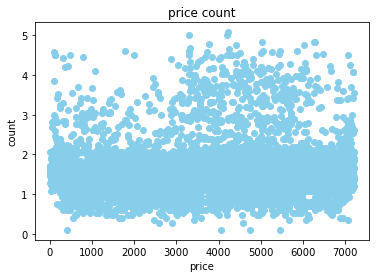

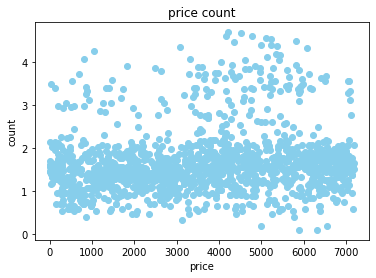

In [214]:
for y in [y_train_log,y_val_log]:
    plt.Figure(figsize=(50,25))
    plt.plot(y,'o', color = 'skyblue')
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title('price count')
    plt.show()

# Model selection

In [215]:
# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
# params_grid 
XGB =  {'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        }

LR_grid =  {}


RF_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
        'max_depth': [4, 6, 8, 10, 12]}

Ridge_grid = {'alpha': [0.1, 1, 10, 100]}


In [217]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge


models = {
    "XGB": XGBRegressor(),
    # "LR": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=0),
    "Ridge":Ridge()
}

params_grid = {
    "XGB": XGB,
    # "LR": LR_grid,
    "RandomForest": RF_grid,
    "Ridge":Ridge_grid
}

best_models_result = []

# 定義評估指標（均方誤差）和超參數範圍
scorer = make_scorer(mean_squared_error, greater_is_better=False)

for key, classifier in models.items():
    print(f'Running: {key} model')
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=classifier, param_grid=params_grid[key], cv=5, scoring=scorer)
    grid_result = grid_search.fit(X_train, y_train_log)

    # Get the best model and its score
    best_model = grid_result.best_estimator_
    best_score = grid_result.best_score_

    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)

    # Evaluate the model performance
    mse = mean_squared_error(y_val_log, y_pred)
    unlog_mse = mean_squared_error(y_val,np.exp(y_pred))
    r2 = r2_score(y_val_log, y_pred)

    best_models_result.append([best_model, best_score, mse, r2])

    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", best_score)
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Squared Error (MSE unlog): {unlog_mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}\n")


Running: XGB model
XGB
Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best Score: -0.09375386266797185
Mean Squared Error (MSE): 0.0859
Mean Squared Error (MSE unlog): 23.1982
R-squared (R2): 0.8420

Running: RandomForest model
RandomForest
Best Parameters: {'max_depth': 12, 'n_estimators': 100}
Best Score: -0.10282394736386516
Mean Squared Error (MSE): 0.0978
Mean Squared Error (MSE unlog): 23.4907
R-squared (R2): 0.8201

Running: Ridge model
Ridge
Best Parameters: {'alpha': 0.1}
Best Score: -0.15741513947796074
Mean Squared Error (MSE): 0.1440
Mean Squared Error (MSE unlog): 52.5442
R-squared (R2): 0.7351



/Users/tamchonman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 37239 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tamchonman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 40845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tamchonman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tamchonman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21185 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tamchonman/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 25136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/tamchonman/opt/anaconda3/lib/pyth

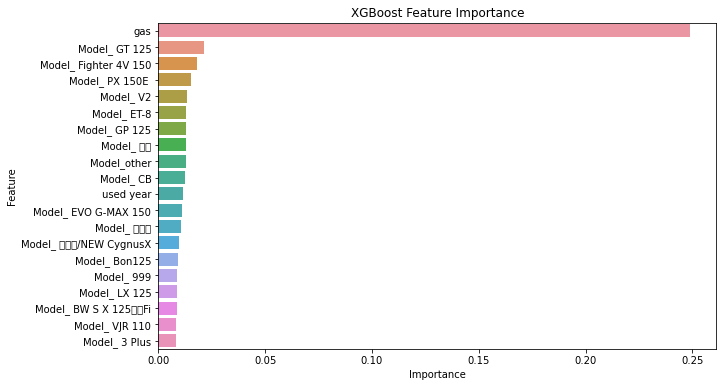

In [221]:
# 創建一個 DataFrame 來存放特徵名稱和對應的重要性
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance':best_models_result[0][0].feature_importances_})

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)[0:20]

# 繪製條形圖
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGBoost Feature Importance')
plt.show()